::: {.callout-note title="Colab Link"}

<center>

[![](images/colab-badge.svg)<br>Click here to **open in Colab**](https://colab.research.google.com/drive/1dfjh-y01PzMoLy647XzPSG1VcI8-7IFp){target="_blank"}

</center>

:::

::: {.callout-note title="Accompanying Video"}

The recording of me going through each step of this writeup in order is now available <a href='https://georgetown.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e8a47e6f-6b57-4728-80a6-b08e003d4439' target='_blank'>here</a>. **Because of the length** of the video, please don't think of it as something you need to watch from start to finish. Instead you can just use it as a resource where, if you encounter something in the writeup that you don't understand, or if there is a particular cleaning step / plot that you want more information about, you can jump directly to that portion of the video.

:::

## (1) Lab Background

### (1.1) The Vietnam / Second Indochinese War

> A massive bombing campaign in Cambodia. Anything that flies on anything that moves.<br>--Henry Kissinger, US National Security Advisor, <a href='https://www.nytimes.com/2004/05/27/us/kissinger-tapes-describe-crises-war-and-stark-photos-of-abuse.html' target='_blank'>Dec. 9, 1970</a>.

In 1965, the United States launched *Operation Rolling Thunder*, a years-long aerial assault on Vietnam which devastated the country and its people (killing <a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2440905/' target='_blank'>over 3 million</a>), irreversably damaging its environment (with more extensive use of <a href='https://www.nytimes.com/2017/11/24/opinion/vietnam-the-chemical-war.html' target='_blank'>chemical weapons</a> like Napalm than in any war before or since), its crops and forests (with 19 million gallons of <a href='https://www.history.com/news/agent-orange-wasnt-the-only-deadly-chemical-used-in-vietnam' target='_blank'>Agent Orange</a> sprayed over 500,000 acres of crops and 5 million acres of forests), and its infrastructure. As a campaign of genuinely unprecedented ferocity and destruction launched by a military superpower against a poor, mostly rural/agrarian country (only 20% of its citizens lived in cities at the time), its <a href='https://jjacobs.me/mdb/chomsky-hr2/' target='_blank'>devastating effects</a> are **still felt to this day** by those in Vietnam, Laos, and Cambodia.

*(All of which is all my not-so-subtle chance to plug, before moving onto the data analysis, the <a href='https://www.halousa.org/get-involved/give/donate/' target='_blank'>donation page</a> for the HALO Trust: an org headquartered right here in NW DC which is leading the worldwide effort to defuse unexploded landmines in these countries, where for example **50,000 Laotians** have been killed by these mines since the war "officially" ended)*

### (1.2) The Role of Data Science in the Devastation

As an example of a war where modern **science and technology** was seen as a central military resource (with chemistry research leading to the deployment of Agent Orange and Napalm, computer science research used to track and target individuals via early instances of **machine learning models**, and social science research used to e.g. justify driving villagers from their homes into concentration camps called "Strategic Hamlets"), it is an important piece of history for data scientists to grapple with: how the technologies we develop **could** be used to help people, but **also** could be used to inflict unimaginable horrors upon millions of innocent civilians. **Datasets** pertaining to this war, many of which have only become publicly/easily-available in the past few years, provide the perfect opportunity to use data science itself to study this example of a military "data science project" of a prior generation.

### (1.3) EDA and Bayesian Statistics: Challenging Prior Beliefs to Derive Posterior Beliefs

Although the entire point of EDA in theory is to go in "without any assumptions" (but see below/slides), I'll give a quick summary of the impression(s) I came away with after the cleaning, tabulating, and visualizing below, in combination with what I knew about it beforehand, so (a) you know what to expect going in and/or (b) so you can use it as a "prior" that you update while working through the visualizations (challenging received assumptions, rather than pretending we have none, should be the goal of EDA imo!)

Briefly: although *Operation Rolling Thunder* is often cited as the beginning of what people in the **US** usually call the **"Vietnam War"**, by looking at the basic collection of tabulations and visualizations herein it slowly emerges that probably the *most* horrifying and unprecedented destruction was experienced not even by those in Vietnam itself but by those in **Laos** over the timespan represented in the dataset (and, after a US-sponsored coup in 1970, **Cambodia** as well). I knew beforehand, for example, that Laos was the most-bombed (per square meter) territory in history, but in terms of the goals of EDA I definitely found my priors about the Vietnam War challenged by what the tables/plots seemed to be "saying" about the underlying historical event.

As a final piece of information to have as part of your prior knowledge, though, before we dive in: Keep in mind that although the numbers we'll be examining are mostly in **absolute** units such as the **number** of bombings, they should be interpreted in the **context** of the relative populations of each country in the dataset, at the beginning of the campaign:

| Country | Population | Year | Source |
| - | - | - | - |
| Cambodia | 6.2 million | 1965 | <a href='https://databank.worldbank.org/source/population-estimates-and-projections?savedlg=1&l=en' target='_blank'>World Bank</a> |
| Laos | 2.4 million | 1965 | <a href='https://databank.worldbank.org/source/population-estimates-and-projections?savedlg=1&l=en' target='_blank'>World Bank</a> |
| Democratic Republic of Vietnam<br>(North Vietnam) | 17.7 million | 1965 | <a href='https://www.documentcloud.org/documents/22435664-economic-intelligence-statistical-handbook-1966' target='_blank'>CIA Intelligence Report</a> (via CREST), 1966, p. 26 |
| Republic of Vietnam<br>(South Vietnam) | 16 million | End of 1964 | <a href='https://www.intelligence.gov/assets/documents/tet-documents/cia/THE%20MANPOWER%20SITUATION%20IN_15472910_.pdf' target='_blank'>CIA Intelligence Report</a> (via CREST), 1968, p. 11 |

### (1.4) Dataset Info

The dataset we'll be analyzing is called the [*Vietnam War Theater History of Operations* (**THOR**) dataset](https://data.world/datamil/vietnam-war-thor-data){target="_blank"}, released by the US Department of Defense in 2015. The raw data is too large (~1.5GB) to easily download and work with, so I'll be using a reduced-form version below, but the full dataset is available at the previous link (from `data.world`).^[My old link to the dataset, from `data.mil`, does not seem to work anymore, and I can't locate this dataset on the Department of Defense's official website anymore, so if someone knows what happened there let me know :D]

## (2) Loading the Data

As you should slowly be getting in the habit of doing, we start by importing:

* **Pandas** (for dataset storage and manipulation),
* **NumPy** (for any mathematical transformations we might want to apply), and
* **Seaborn** (for visualization, whether EDA-focused or otherwise)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Next we **download the dataset**. Technically Pandas' `read_csv()` function does support URL arguments, so that we could load the dataset directly into Pandas via URL, but since we often open and close notebooks, or Jupyter crashes, to avoid re-downloading each time you can run the following line, which should download the `.csv` file into the same directory as wherever this notebook is stored (on Colab, for example, the same portion of your Google Drive that Colab allocates for the storage of the notebook).

Since we've already used Python's `requests` library before, for data scraping, we'll use that here to quickly request and save the file:

In [2]:
import requests
thor_url = "https://jpj.georgetown.domains/dsan5000-scratch/eda/thor_strikes.csv"
with open("thor_strikes.csv", 'wb') as outfile:
  csv_content = requests.get(thor_url, stream=True).content
  outfile.write(csv_content)

If the download was successful, you should have a `thor_strikes.csv` file in the same folder as this notebook (in Colab you can check the file tab in the sidebar on the left side of the page). We can then use `pd.read_csv()` to load the `.csv`-formatted dataset, and we can re-load the dataset again in the future without having to worry about re-downloading it.

In [3]:
strike_df = pd.read_csv("thor_strikes.csv")

Another good habit you can get into is always checking the output of the `.head()` function after loading the dataset, just to make sure that everything loaded as you expected. It usually doesn't (😅)

In [4]:
strike_df.head()

,MFUNC_DESC,MISSIONID,TGTCOUNTRY,THOR_DATA_VIET_ID,MSNDATE,SOURCEID,NUMWEAPONSDELIVERED,TGTTYPE,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84
0,STRIKE,1047,LAOS,4,1970-02-02,642780,2,TRUCKS,16.902500,106.014166
1,STRIKE,1407,LAOS,6,1970-11-25,642782,6,AAA\37MM CR MORE,19.602222,103.597222
2,STRIKE,9064,LAOS,7,1972-03-08,642783,0,TRUCKS,14.573611,106.689722
3,STRIKE,8630,LAOS,16,1971-05-12,642792,4,TRK\PRK\STORE AREA,17.563611,105.756666
4,STRIKE,1391,LAOS,18,1971-12-19,642794,0,PERSONNEL\ANY,16.864166,105.349166


In our case, though, the output looks pretty much as expected, in terms of Pandas being able to automatically detect the header row and the splits between columns. So, let's move on to the EDA!

## (3) Missing Data

First things first, before we worry about missing data itself, we should think about **which variables we want to analyze**, since for now we can just worry about checking for missing values within the columns corresponding to these variables.

The **official 59-page codebook for the dataset**, an absolutely crucial thing to have on hand during any data analysis, [can be found at this link](https://jpj.georgetown.domains/dsan5000-scratch/eda/THOR%20Draft%20Data%20Dictionary%20Dec%202016.pdf){target="_blank"}. To skip over you having to read a 59-page document, though, I'll now introduce a shortened, simplified codebook.

In our case, since we're doing **exploratory** data analysis, in theory we shouldn't have any hypotheses in mind yet. In reality we **do** have hypotheses in our heads, subconsciously at least, so when I say that I just mean that we're not directly trying to **confirm** or **deny** these hypotheses at this stage. We are just hoping to **question**/**interrogate** them as we go along...

Keep in mind Tukey's metaphor, that:

* **EDA = detective work**, collecting evidence for a future trial, while
* **CDA = the trial itself**!

I'm just going to focus on a few key variables which are central to understanding the processes underlying the data (the destruction of the countries across former Indochina). Let's also think about **what type of data** each column represents---categorical vs. numeric, ordinal vs. cardinal, etc. Just like in the lab we can then use this info, as recorded in the following table, as our **codebook** for understanding what each variable represents:

| Variable Name | Description | Variable Type | Datatype |
| - | - | - | - |
| `TGTCOUNTRY` | This should tell us, for a given strike, the **country** within whose borders the strike was carried out. | Categorical | `string` |
| `MSNDATE` | This should tell us the **date** (in Y/M/D format) that the strike was carried out. | Discrete numeric (date) | **`object`**(!) (see below) |
| `TGTTYPE` | This should tell us the **type** of target, e.g., whether it was a vehicle, a group of people, an individual person, etc. | Categorical | `string` |
| `TGTLATDD_DDD_WGS84` | The **latitude** coordinate of the target | Continuous | `float` |
| `TGTLONDD_DDD_WGS84` | The **longitude** coordinate of the target | Continuous | `float` |

As our first EDA task, let's look into the first variable in the table above: `TGTCOUNTRY`. As the section header suggests, we're going to see if this column has any **missing data** and, if so, what the missing data means and what to do about it.

**[Crucial point here:]** If we started using Pandas methods with their default arguments, we might get to thinking that nothing is wrong here, and move on from missing data checks... Take a look at what the `value_counts()` function returns when we use this function to look at the distribution of values in `TGTCOUNTRY` without including any additional parameters:

In [5]:
strike_df['TGTCOUNTRY'].value_counts()

TGTCOUNTRY
LAOS              690161
NORTH VIETNAM     245977
SOUTH VIETNAM      54253
CAMBODIA           13271
THAILAND             146
UNKNOWN               23
WESTPAC WATERS         6
Name: count, dtype: int64

All seems well from this table: we might think "ok, great, they have encoded the 23 missing values from the original non-digitized data as `"UNKNOWN"`, and all the other values are interpretable non-missing labels, so we're good right?"

Sadly we're **NOT GOOD 😭**. Let's check one more thing, to slowly move towards the hidden issue here. Let's start by **summing up** the counts that `value_counts()` has given us for each value:

In [6]:
value_counts_sum = strike_df['TGTCOUNTRY'].value_counts().sum()
value_counts_sum

1003837

Next let's take a look at the total number of rows and columns in our `DataFrame`, by checking the `shape` attribute

[Here it's important to note that, unlike most of the other attributes that we use to analyze `DataFrame` objects, `shape` is **not a function** but a **static variable**, an **attribute** of the `DataFrame` object. That's why we just use `.shape` rather than `.shape()` to access this information.]

In [7]:
num_rows = strike_df.shape[0]
num_rows

1007674

Do you see the issue? If not, let's check the difference between these two values:

In [8]:
num_rows - value_counts_sum

3837

This tells us, to our horror, that there are **3,837** rows in our `DataFrame` which are completely unaccounted-for in the output produced by `value_counts()` 😰

And the reason is, as it turns out, the `value_counts()` function **excludes missing values** by default, so that the above output actually tells us **absolutely nothing** about whether or not there are missing values in the column! Scary stuff.

There is an easy fix, however: we can just include the `dropna = False` argument in our call to the `value_counts()` function, which will override this default behavior and show missing values as one of the possible values in the table of counts:

In [9]:
strike_df['TGTCOUNTRY'].value_counts(dropna = False)

TGTCOUNTRY
LAOS              690161
NORTH VIETNAM     245977
SOUTH VIETNAM      54253
CAMBODIA           13271
NaN                 3837
THAILAND             146
UNKNOWN               23
WESTPAC WATERS         6
Name: count, dtype: int64

And now we see that, in fact, there are **thousands of strikes** for which no target country was recorded in the dataset: about **167 times more missing data** than we originally thought when we only saw that 23 of the rows had a `TGTCOUNTRY` value of `"UNKNOWN"`.

So, what can we do about this? In later weeks of the course and/or in later weeks of DSAN5100 we'll learn about some more advanced methods for **inputing missing values**, for example by **explicitly modeling the data-generating process** that led some of the values to be missing. Until we know how to do that, however, for the sake of moving on with the EDA we will ignore these rows when we move onto other EDA tasks, **keeping in mind that this is NOT acceptable practice in general for data science, outside of tutorial examples like this!!**

Before we move to those tasks, however, let's quickly look at how we can visualize the **distribution of missing values** in this column (along with the other columns), using the third-party <a href='https://libraries.io/pypi/missingno' target='_blank'>`missingno` package</a> mentioned in the lab instructions!

In [10]:
!pip install missingno

I don't want to give away the answer to this portion of the lab by producing a missing-data matrix directly, so instead I will use a different but still very helpful function from `missingno`, the `msno.bar()` function, to visualize missingness across the different variables in our `DataFrame`:

In [11]:
import missingno as msno

<Axes: >

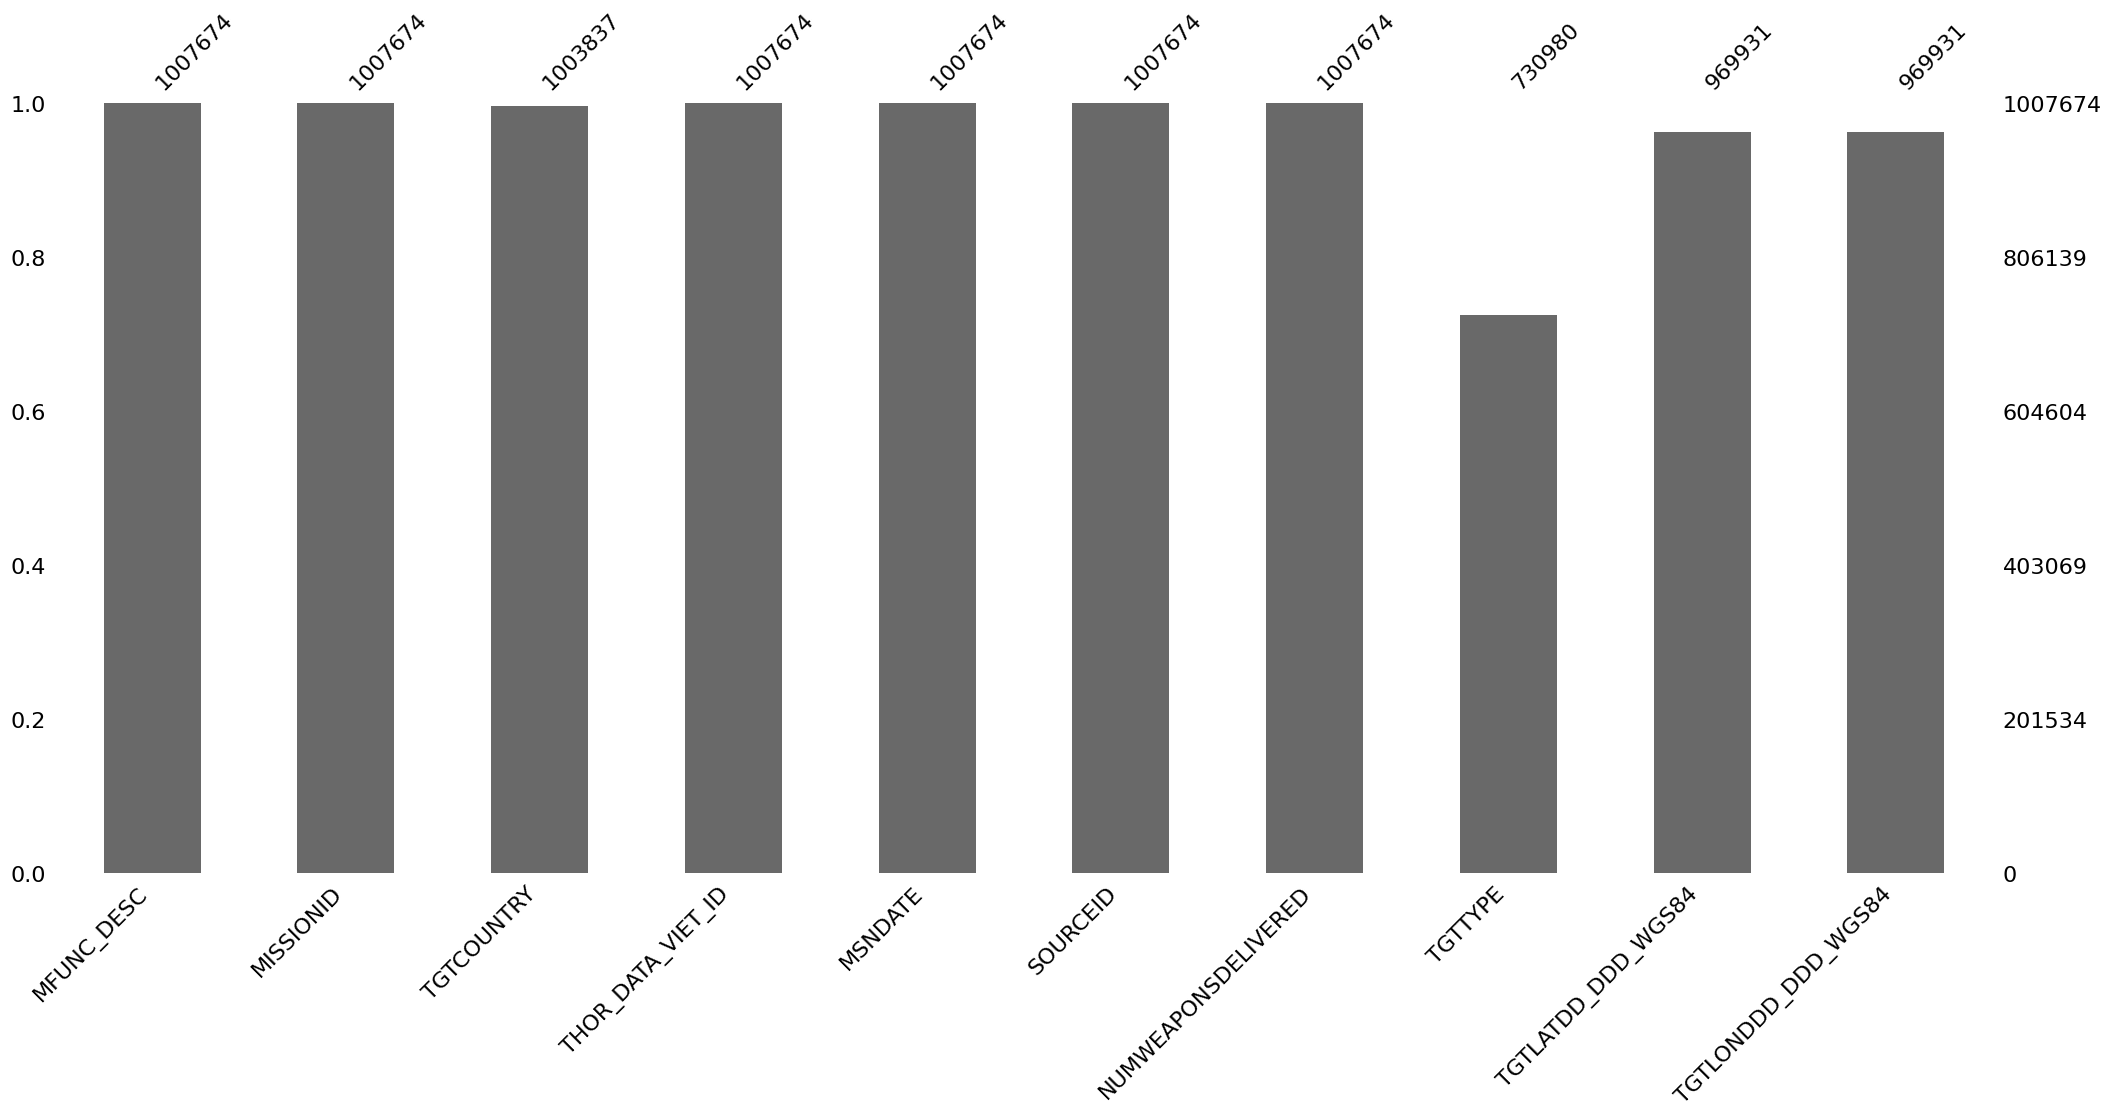

In [12]:
msno.bar(strike_df)

Although we see in hindsight that the visual properties of this plot would not have been that useful in discovering the missing values in `TGTCOUNTRY` (I say "visual properties" because it still helpfully provides the non-missing **counts** at the top of each bar, which could have allowed us to see this issue), the plot is **very useful** for discovering the missingness prevalent in the `TGTTYPE` variable. So, just like in the case of `TGTCOUNTRY`, we will move on while **keeping in mind that this variable has an even more extreme issue with missingness** that will bias our results (until we learn how to explicitly incorporate and de-bias the missingness!)

## (4) Different Formats Within The Same Column

### (4.1) The Ambiguous `object` Type

As our next EDA task, let's look into that **(!)** in the table above: while the rest of the variables are in fairly unambiguous formats, `object` is a particularly scary datatype in Pandas, since "object" in fact just means that **the datatype of a given value in this column could be anything**. If you know Java, for example, you know that `Object` is the datatype that all other datatypes are **subtypes** of. Similarly, in Python, every class implicitly **inherits** the properties of <a href='https://docs.python.org/3/library/functions.html#object' target="_blank">the `object` class</a>.

Looking at the output of `head()` from above, however, you may reasonably think that the entries in this column will all be of `string` type. And this instinct would be further enforced by **checking the datatypes** of the first five entries in the column:

In [13]:
strike_df['MSNDATE'].head().apply(type)

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: MSNDATE, dtype: object

Therefore, you might start moving ahead, working with this column as if it is a string column. **You should push back on this instinct!!** It will save you so many headaches later on, when you are neck-deep in the data analysis, if you **verify what's going on with any columns that Pandas loaded as `object` type** right at the beginning!

For example, rather than drawing inferences about the **entire dataset** from only the **first five columns** (a procedure jokingly referred to as <a href='https://geoffreywu.me/blog/engineers-induction/' target='_blank'>"engineer's induction"</a>), we can do something a bit less error-prone by making a **new column** `MSNDATE_type` which just tells us the type of each value in the `MSNDATE` column, then checking whether or not every entry in `MSNDATE_type` is `string`. If it is, then we're fine adopting the it's-a-string-variable assumption and moving on. But if it's not, we'll have to do something to handle the mismatch. Let's see what happens. We'll make the column, then we'll use the `value_counts()` function from Pandas to see the distribution of datatypes in the column (where now we remember that we pretty much always want to include the `dropna = False` parameter):

In [14]:
strike_df['MSNDATE_type'] = strike_df['MSNDATE'].apply(type)

In [15]:
strike_df['MSNDATE_type'].value_counts(dropna=False)

MSNDATE_type
<class 'str'>    1007674
Name: count, dtype: int64

So far so good: Pandas loaded the column as type `object`, which **often means** but **does not always mean** that the column is filled with `string` variables. There is still one more issue with this column, however, looming on the horizon...

### (4.2) Splitting The Column Into Parts

Since in general we want to analyze the **yearly volume** of strikes in each country, the format of the values in the `MSNDATE` column is not that helpful to us at the moment. So, again we might proceed by intuition, using **engineer's induction** on the first five rows of the `DataFrame` to infer that we can just **split on the `-` character** to quickly divide this single column into three separate columns: one for year, one for month, and one for day.

Let's see what happens when we try this out.


**Writing the Parse Function**

In Python, unlike the nice `separate_wider_*()` functions in R that I talked about in <a href='https://jjacobs.me/dsan5000/463a01339cf0f456ba54a1849df50d1a22c247e3/writeups/tidyverse-split-column/' target='_blank'>this writeup</a>, I personally haven't found all that many helpful functions specially-made for splitting a string up into pieces.

So, what I **usually** do in this type of situation (but see a few sections below) is utilize the following setup: as a nice "trick" for generating multiple columns from one individual column, Pandas allows you to write functions which return `pd.Series` objects (these `Series` objects are sort of like one-dimensional `DataFrame`s), and then use this function to set the values of **multiple columns** in one "sweep" using syntax like:

```python
def function_returning_series_object(value):
  """
  A function that will take in a single value from a column and
  return a pd.Series object, where the **keys** in the pd.Series
  correspond to the **names of the columns** you're hoping to create
  """
  // Do something with `value` to generate these results
  resulting_x_value = 'first result'
  resulting_y_value = 'second result'
  resulting_z_value = 'third result'
  series_values = {
    'x' = resulting_x_value,
    'y' = resulting_y_value,
    'z' = resulting_z_value
  }
  return pd.Series(series_values)

// Specify the names of the columns you're about to create
columns_to_create = ['x','y','z']
// And use the apply() function to "send" the values of some existing column
// to the function_returning_series_object() function defined above
df[columns_to_create] = df['some_existing_column'].apply(function_returning_series_object)
```


In our case, so you can see this in action, let's define a function that will take in the values of the `MSNDATE` column (which we expect to have the format `YY-MM-DD`, split these values on the `-` character, and return the three resulting pieces in `pd.Series` form with the keys `year`, `month`, and `day`.

In [16]:
def split_date(date_val):
  date_elts = date_val.split("-")
  date_values = {
      'year': date_elts[0],
      'month': date_elts[1],
      'day': date_elts[2]
  }
  return pd.Series(date_values)


::: {.callout-note title="The `tqdm` Library"}

**Quick Note: `tqdm`**

When we use the `apply()` function from Pandas to apply our `split_date()` function to each value of the `MSNDATE` column, it will take kind of a long time to iterate through and parse each date. For this reason, I'm including example code here showing how to import and use the third-party Python library `tqdm` to create a new `progress_apply()` function. If the waiting feels tedious on your machine, for example, you can call `progress_apply()` in the place of `apply()`, which will display a **progress bar** showing far along it is. In Colab this will work right away, since `tqdm` comes pre-installed. Depending on your environment it may crash though, since some versions of `tqdm` are incompatible with some versions of `pandas`, so to be safe I'm sticking with the regular `.apply()` function 

:::

In [17]:
from tqdm.notebook import tqdm
tqdm.pandas()

**Back to EDA**

The running time of the `progress_apply()` call will be bad enough, but as we'll see, it gets even worse: right near the end, about 63% of the way through, the code will **crash** with an error! (You can uncomment the following code, run it, and wait a bit to see the error if you'd like, or just jump past the following cell)

In [18]:
## And apply it to MSNDATE
#columns_to_create = ['year','month','day']
#strike_df[columns_to_create] = strike_df['MSNDATE'].progress_apply(split_date)

The error looks like:

```python
<ipython-input-35-ec79f5e7def4> in split_date(date_val)
      3   date_values = {
      4       'year': date_elts[0],
----> 5       'month': date_elts[1],
      6       'day': date_elts[2]
      7   }

IndexError: list index out of range
```

So what happened?

Long story short, **engineer's induction failed us again**. It turns out that some entries within the `MSNDATE` column contain dates in a **different format** from the format we saw in the first 5 rows of the dataset. But how did I magically figure this out?

Let's start by carrying out Engineer's Induction 2.0 (TM), by looking at the **tail** of `strike_df` rather than the head. Sometimes, if the column has one format at the beginning, but another near the end, this will show us the alternative format:

In [19]:
strike_df.tail()

,MFUNC_DESC,MISSIONID,TGTCOUNTRY,THOR_DATA_VIET_ID,MSNDATE,SOURCEID,NUMWEAPONSDELIVERED,TGTTYPE,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,MSNDATE_type
1007669,STRIKE,1405,LAOS,4559448,1973-01-01,58102,0,PERSONNEL\ANY,15.191111,106.206666,<class 'str'>
1007670,STRIKE,8719,LAOS,4560531,1972-05-08,68563,0,NaN,16.758055,106.461944,<class 'str'>
1007671,STRIKE,9526,SOUTH VIETNAM,4561255,1972-07-10,69287,0,NaN,16.684166,107.053888,<class 'str'>
1007672,STRIKE,0692,LAOS,4650354,1970-11-28,527864,0,TRUCKS,17.286388,105.609722,<class 'str'>
1007673,STRIKE,7232,LAOS,4651825,1971-10-19,541658,4,NaN,15.292777,107.137500,<class 'str'>


We're not so lucky this time. The **last 5 values** of the `MSNDATE` column look like they're formatted the same way as the first 5 values are.

So, next let's do something a bit smarter, and just check **how many `-` characters** each entry has---we can code this check in a very similar way to how we coded the check above when we looked at the `type` of each entry in the column.

In fact, here we don't even need to come up with our own function and use `apply()` or anything like that, since Pandas has built-in functionality allowing us to access (by using the `.str` suffix after extracting just the `string`-format column) any of Python's built-in functions for `string`s, like `len()` or `replace()`, at which point Pandas will then automatically apply our chosen to each value in the column.

So, let's use this `.str` suffix to apply the built-in `count()` function (that Python provides for all `string` objects) to each value of `MSNDATE`, counting the number of times that `-` appears in each value, then look at the **distribution** of these counts across the entire column:

In [20]:
strike_df['MSNDATE_dashcount'] = strike_df['MSNDATE'].str.count("-")

In [21]:
strike_df['MSNDATE_dashcount'].value_counts()

MSNDATE_dashcount
2    993524
0     14150
Name: count, dtype: int64

And we've found our issue: 14,150 of the rows do **not** use a `YYYY-MM-DD` format! Since we now have this `MSNDATE_dashcount` column available to use, let's filter the full `DataFrame` to look at just (the first few) rows where it is equal to `0`, i.e., rows where the `MSNDATE` column does **not** contain any dashes:

In [22]:
strike_df.loc[strike_df['MSNDATE_dashcount'] == 0,].head()

,MFUNC_DESC,MISSIONID,TGTCOUNTRY,THOR_DATA_VIET_ID,MSNDATE,SOURCEID,NUMWEAPONSDELIVERED,TGTTYPE,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,MSNDATE_type,MSNDATE_dashcount
639026,STRIKE,JH301,SOUTH VIETNAM,2876015,19700409,258195,12,AREA\DEPOT,14.825953,107.716270,<class 'str'>,0
639027,STRIKE,JH309,SOUTH VIETNAM,2876638,19700216,262548,24,AREA\DEPOT,14.510215,108.768815,<class 'str'>,0
639028,STRIKE,01305,SOUTH VIETNAM,2876852,19651029,221263,0,UNKNOWN\UNIDENTIFIED,10.186505,106.229604,<class 'str'>,0
639029,STRIKE,JG402,SOUTH VIETNAM,2877103,19701114,219532,24,AREA\DEPOT,16.331801,107.012509,<class 'str'>,0
639030,STRIKE,J8012,LAOS,2877181,19700721,219801,48,TRUCK PARK\STOP,16.286964,106.922250,<class 'str'>,0


And we see that, to our relief, the issue isn't so bad: if engineer's induction **does** hold for this situation, then (hopefully) we can split those 14,150 rows **without** any dashes by just taking the `MSNDATE` values in these rows and directly extracting the first 4 characters as the `year`, the next 2 characters as the `month` and the final 2 characters as the `day`. As an additional sanity check here, since we are using engineer's induction, we can check the full range of possible **lengths** of the `MSNDATE` values:

In [23]:
strike_df['MSNDATE_len'] = strike_df['MSNDATE'].str.len()
strike_df['MSNDATE_len'].value_counts()

MSNDATE_len
10    993524
8      14150
Name: count, dtype: int64

And we see another encouraging sign: that there is not (for example) some third length that the values of this column can have, that we'd need to worry about on top of the two different formats we've found

*(There still **could** be more than two formats, if the additional formats happened to produce date strings with length 8 or 10, but we'll worry about that if we experience more issues with splitting `MSNDATE` under the assumption of two formats)*

**Re-Coding the Date Parsing Function: v2.1**

So let's make an updated version of our `split_date()` function, which explicitly checks whether the date it is given is encoded in the 8-character or 10-character format, and does the splitting accordingly:

In [24]:
def split_date_v2_1(date_val):
  if len(date_val) == 10:
    # Do what we did before, using .split()
    date_elts = date_val.split("-")
    date_values = {
      'year': date_elts[0],
      'month': date_elts[1],
      'day': date_elts[2]
    }
  else:
    # Assume it is in YYYYMMDD format, so that we can
    # just extract substrings to obtain Y, M, and D
    date_values = {
        'year': date_val[0:4],
        'month': date_val[4:6],
        'day': date_val[6:8]
    }
  return pd.Series(date_values)


And now we **could** run this using the same `.apply()` code as before, to see if it successfully parses the column. In the first version of the writeup I did run it, but it took about ~5 minutes, which is too long for a reasonable quick-learning writeup, imo! (You could just go ahead and create a cell containing the following code, and run it, if you are ok waiting for 5mins:)

```python
columns_to_create = ['year','month','day']
strike_df[columns_to_create] = strike_df['MSNDATE'].progress_apply(split_date_v2)
```

For me, though, 5 minutes is too slow, so here is a screenshot of the output after this call to `progress_apply()` has finished:

![](images/pandas_progress.jpg)

::: {.callout-note title="The `swifter` Library"}

**Another Quick Note: `swifter`**

*Like last time, this may take a while to complete: cases like these are where I highly recommend using `tqdm`, at a minimum!*

*There is also the third-party library <a href='https://github.com/jmcarpenter2/swifter' target='_blank'>`swifter`</a>, which would be nice for the kinds of <a href='https://en.wikipedia.org/wiki/Embarrassingly_parallel' target='_blank'>embarrasingly parallel</a> tasks we're applying to the column here, except that (as far as I can tell) `swifter` is only able to provide speedups for **numeric** operations :/ I thought I'd mention it here, however, since if you are doing some **numeric** operation that's taking this long, you might try seeing if `swifter` will speed up your code!*

:::


And as an example of the vast differences that can arise between efficient and inefficient versions of processing code, even in EDA: since I really only need to extract the **year** (rather than the three elements of each date) for the remaining analysis, for speed I used the following `lambda` function instead, which just scoops out the **first 4 characters** of the `MSNDATE` value (which works because, in either format, the first 4 characters of the string contain the year), and it took approximately 1 second to finish:

In [25]:
# Depending on your Jupyter environment, you may need to install/update the
# `ipywidgets` library for `tqdm` to work correctly
#!pip install ipywidgets

In [26]:
# progress_apply() version (with progress bar)
#strike_df['year'] = strike_df['MSNDATE'].progress_apply(lambda x: x[0:4])
# apply() version
strike_df['year'] = strike_df['MSNDATE'].apply(lambda x: x[0:4])

Finally, now that we've extracted just the **year** of the mission into its own column, let's convert that column from `string` format into `int` format. There are a lot of ways to do this type of conversion, but for me the `pd.to_numeric()` function is most useful for several reasons, so I'll use that:

In [27]:
strike_df['year'] = pd.to_numeric(strike_df['year'])

And as we can see by checking the `.dtypes` attribute (as with **shape**, remember that **dtypes** is **not a function**!), `year` now has the `int64` (64-bit integer) format, as we wanted:

In [28]:
strike_df.dtypes

MFUNC_DESC              object
MISSIONID               object
TGTCOUNTRY              object
THOR_DATA_VIET_ID        int64
MSNDATE                 object
SOURCEID                 int64
NUMWEAPONSDELIVERED      int64
TGTTYPE                 object
TGTLATDD_DDD_WGS84     float64
TGTLONDDD_DDD_WGS84    float64
MSNDATE_type            object
MSNDATE_dashcount        int64
MSNDATE_len              int64
year                     int64
dtype: object

## (5) Collapsing Messy Categorical Variables Into Clean Ones

The one variable we should still look at is `TGTTYPE`: although we already saw how messy it was in the sense of having lots of missing values, it turns out that it is also messy in the sense of having lots and lots of potential values, some of which are very similar but not identical, so that (for example) trying to include this variable as a "factor variable" in a cross-tabulation or a two-way plot (see below) would result in a very messy plot with too many bars/lines/colors/etc.

This becomes clear if we run the following code, showing that there are **235 possible values** that this categorical variable can take on:

In [29]:
strike_df['TGTTYPE'].value_counts()

TGTTYPE
AREA\DEPOT         118271
MOTOR VEHICLE      108533
TRUCK PARK\STOP     77840
ROAD                60494
ANTI-AIRCRAFT       52870
                    ...  
AMMO BLDG               1
CP                      1
MOUNTAIN PASS           1
SAM OXIDIZER            1
MIG19                   1
Name: count, Length: 235, dtype: int64

Since we're focusing on EDA and visualization, though, let's treat this `value_counts()` table as a "mini-dataset" and generate an EDA-style visualization of how many instances of each possible category actually appear in the broader dataset. We'll call this mini-dataset `target_dist`, since it represents just the counts (and therefore, as a whole, the distribution) of the various possible target-type categories. Note, however, that because `value_counts()` returns a **`pd.Series`** object, **not** a `pd.DataFrame` object, we'll need to explicitly convert its return value into a `pd.DataFrame` (plus turn the index column into a "regular" column and rename it from `index` into something more informative) in order to use it with Seaborn.

In [30]:
target_dist_df = pd.DataFrame(strike_df['TGTTYPE'].value_counts()).reset_index()
target_dist_df.columns = ['TGTTYPE_val','count']
target_dist_df

,TGTTYPE_val,count
0,AREA\DEPOT,118271
1,MOTOR VEHICLE,108533
2,TRUCK PARK\STOP,77840
3,ROAD,60494
4,ANTI-AIRCRAFT,52870
...,...,...
230,AMMO BLDG,1
231,CP,1
232,MOUNTAIN PASS,1
233,SAM OXIDIZER,1


In [31]:
target_dist_df.iloc[:20]

,TGTTYPE_val,count
0,AREA\DEPOT,118271
1,MOTOR VEHICLE,108533
2,TRUCK PARK\STOP,77840
3,ROAD,60494
4,ANTI-AIRCRAFT,52870
5,TROOPS,47532
6,BRIDGE,28272
7,UNKNOWN\UNIDENTIFIED,27328
8,BUILDINGS,24453
9,SEGMENT\TRANS ROUTE,24181


Now we can think about how to visualize this: since `target_dist` represents a **distribution** (in particular, a **distribution of counts**), essentially we have already done the set of computations that the `sns.displot()` function demonstrated in the very beginning of the <a href='https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/seaborn-introduction/notes.html' target='_blank'>W06 Lab Demo</a> performs under the hood. Meaning: if we **hadn't** already computed counts for each value of `TGTTYPE`, we could use `sns.displot()` with the original `strike_df` dataset to visualize these counts. Since we've already computed counts, however, we can more straightforwardly just plot each count as a bar in a `sns.barplot()` visualization (which will look identical to what `sns.displot()` would generate given `strike_df`).

*(I mentioned the fact that `target_dist` is a distribution of counts since, although `displot()` can be used for both **probability** distributions and distributions of **counts**, the y-axis for plots of **counts** will be even easier to interpret than the y-axis for plots of probability mass values, since in the latter case the y-axis values will be "squished down" into decimals ranging from 0 to 1)*

/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


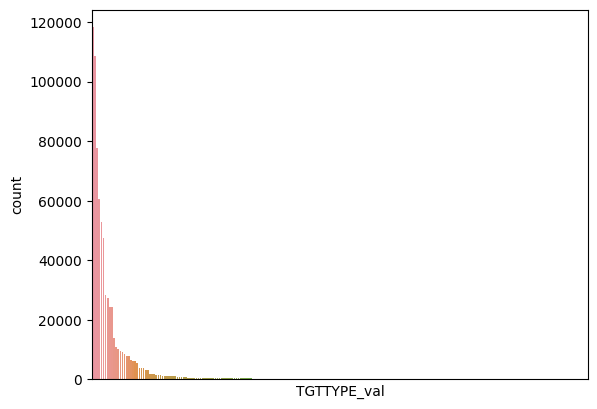

In [33]:
# Since Seaborn is built on top of `matplotlib`, we usually import these two libraries
# in the following order, and use the aliases `plt` and `sns`, respectively"
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data=target_dist_df,
    x="TGTTYPE_val",
    y='count'
).set(xticks=[], xticklabels=[])
plt.show()

After the call to `sns.barplot()` in the previous cell, notice that I'm also calling `.set()` with the options `xticks=[]` and `xticklabels=[]`. This call with these options simply removes all ticks and tick labels on the x-axis of the plot, since otherwise it would have displayed a chaotic overlapping mass of 235 ticks and 235 labels. Without these ticks/labels, we are able to focus just on the distribution of the y-axis values, and especially the fact that they start to **decrease rapidly after a certain point**.

This rapid decrease tells us, for example, that we can probably either

* (a) aggregate the rarely-appearing values into broader categories, to see if they are (for example) just slightly-modified versions of the more-frequently-appearing values [the safer, more statistically-principled approach], or
* (b) ignore these values when we're examining cross-tabulations and/or generating visualizations where data is grouped by these values.

Since we're focusing on EDA, I'll be employing approach (b), but please keep in mind that **you might be throwing away important information** by ignoring these less-frequently-occurring values (many examples come to mind, but to avoid making the writeup any longer I will just say, feel free to ask about these cases!)

Therefore, I'm going to (arbitrarily!) **keep the top 10 most-frequently occurring values**, and then collapse any values beyond this top 10 down into an 11th catch-all category called **"other"**:

In [37]:
# Extract just the 10 most-frequently occurring values
rank_cutoff = 10
most_frequent_values = target_dist_df['TGTTYPE_val'].iloc[:rank_cutoff].values
# Print them out (for future reference)
print(most_frequent_values)
# Then take the **set difference** between the **full set of values** and the
# **values that we're keeping**, and re-map these remaining values onto the single value
# "other"
all_values = target_dist_df['TGTTYPE_val'].values
non_frequent_values = [v for v in all_values if v not in most_frequent_values]
# Sanity check
num_non_frequent = len(non_frequent_values)
print(f"{num_non_frequent} non-frequent values")
# And apply the mapping to the original strike_df dataset
rename_map = {nfv: "other" for nfv in non_frequent_values}
strike_df['TGTTYPE'] = strike_df['TGTTYPE'].apply(lambda x: rename_map[x] if x in rename_map else x)
# Print out the new value_counts, to check that the mapping worked
strike_df['TGTTYPE'].value_counts()

['AREA\\DEPOT' 'MOTOR VEHICLE' 'TRUCK PARK\\STOP' 'ROAD' 'ANTI-AIRCRAFT'
 'TROOPS' 'BRIDGE' 'UNKNOWN\\UNIDENTIFIED' 'BUILDINGS'
 'SEGMENT\\TRANS ROUTE']
225 non-frequent values


TGTTYPE
other                   161206
AREA\DEPOT              118271
MOTOR VEHICLE           108533
TRUCK PARK\STOP          77840
ROAD                     60494
ANTI-AIRCRAFT            52870
TROOPS                   47532
BRIDGE                   28272
UNKNOWN\UNIDENTIFIED     27328
BUILDINGS                24453
SEGMENT\TRANS ROUTE      24181
Name: count, dtype: int64

## (6) Tabulation and Cross-Tabulation

Now that we're finally done with those fairly messy/tedious cleaning steps, let's make some tables!

### (6.1) Summary Statistics Table: `.describe()`



First, as in the other lab demo you have, let's use `.describe()` to create a table showing us some basic summary statistics about our now-cleaned variables. Your first instinct might be to just call `strike_df.describe()`, as in the following code cell, but that's another instinct you should probably push back on:

In [38]:
strike_df.describe()

,THOR_DATA_VIET_ID,SOURCEID,NUMWEAPONSDELIVERED,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,MSNDATE_dashcount,MSNDATE_len,year
count,1.007674e+06,1.007674e+06,1.007674e+06,969931.000000,969931.000000,1.007674e+06,1.007674e+06,1.007674e+06
mean,2.264882e+06,1.712625e+06,1.202383e+01,17.221362,105.875013,1.971916e+00,9.971916e+00,1.969216e+03
std,1.278396e+06,1.321200e+06,5.958607e+01,1.801880,1.249900,2.353301e-01,2.353301e-01,1.738883e+00
min,4.000000e+00,3.000000e+00,0.000000e+00,0.247721,43.416666,0.000000e+00,8.000000e+00,1.965000e+03
25%,1.164722e+06,5.796808e+05,0.000000e+00,16.430555,105.712000,2.000000e+00,1.000000e+01,1.968000e+03
50%,2.264671e+06,1.454324e+06,4.000000e+00,17.125000,106.155833,2.000000e+00,1.000000e+01,1.969000e+03
75%,3.218455e+06,2.593384e+06,1.200000e+01,18.000000,106.638000,2.000000e+00,1.000000e+01,1.970000e+03
max,4.670411e+06,4.909001e+06,9.822000e+03,135.717675,167.500000,2.000000e+00,1.000000e+01,1.975000e+03


We see that this output looks kind of messy, if we don't **filter out non-numeric-variable columns** like the `id` variables or the `_dashcount` and `_len` variables we created as helper columns above. If we **do** take care to filter out those columns first, `.describe()` provides us with more focused and more useful information.

First we drop the helper columns, since we don't need these anymore now that `MSNDATE` has been cleaned to our satisfaction. We use the `inplace = True` argument to Pandas' `drop()` function to indicate that we want to **permanently** drop these two columns:

In [39]:
cols_to_drop = [
    'MSNDATE_len',
    'MSNDATE_dashcount',
    'MSNDATE_type'
]
strike_df.drop(columns = cols_to_drop, inplace = True)

And now we specify just the subset of numeric columns we'd like summaries of, and call `.describe()` only on that subset:

In [40]:
# I break the column names onto separate lines here to make it easy for
# myself to go back and include/exclude columns from the call to describe():
# I just comment/uncomment the line corresponding to the column I want to
# hide/show, respectively
numeric_cols = [
    'NUMWEAPONSDELIVERED',
    'TGTLATDD_DDD_WGS84',
    'TGTLONDDD_DDD_WGS84',
    'year'
]
# pd.option_context() has kind of a strange syntax, but it just allows us to
# specify how to format each number in the result of the call to describe()
# without having to worry about permanently changing our Pandas display
# settings
with pd.option_context('display.float_format', '{:.2f}'.format):
  display(strike_df[numeric_cols].describe())

,NUMWEAPONSDELIVERED,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,year
count,1007674.00,969931.00,969931.00,1007674.00
mean,12.02,17.22,105.88,1969.22
std,59.59,1.80,1.25,1.74
min,0.00,0.25,43.42,1965.00
25%,0.00,16.43,105.71,1968.00
50%,4.00,17.12,106.16,1969.00
75%,12.00,18.00,106.64,1970.00
max,9822.00,135.72,167.50,1975.00


And already, just from this description, we can make some simple but important inferences: for example that 75% of the bombings were carried out before or during the year 1970, despite the fact that the bombing campaign as a whole did not end until 1975 (which we can see from the **max** value of `year`)

### (6.2) Cross-Tabulation of the Relationship Between Two Variables

If you googled "cross-tabulation in pandas" like the lab asks you to (which I hope you did in the days between the lab handout and this writeup!), you'll find the Pandas function `crosstab()`.

`crosstab()` works similarly to `describe()` except that, rather than computing summary statistics across the **entire dataset**, it computes a set of **conditional summary statistics**, so that we can use it e.g. to examine the distributions of a numeric variable (say, `year`) for different values of a **categorical** variable (say, `TGTCOUNTRY`). Here we use it with its default parameter settings to generate a table showing us the **number of strikes** within each cross-tabulated "bin"---that is, each `(year,country)` pair where `year` is some value in the `year` column and `country` is some value in the `TGTCOUNTRY` column:

In [41]:
pd.crosstab(strike_df['year'], strike_df['TGTCOUNTRY'])

TGTCOUNTRY,CAMBODIA,LAOS,NORTH VIETNAM,SOUTH VIETNAM,THAILAND,UNKNOWN,WESTPAC WATERS
year,,,,,,,
1965,0,1197,2596,9238,0,0,0
1966,0,16825,24261,4918,11,0,0
1967,18,29738,69420,1004,6,0,0
1968,0,105046,108110,3763,81,19,6
1969,23,167010,729,1353,41,4,0
1970,6099,209273,1801,2684,7,0,0
1971,1130,107675,3342,7932,0,0,0
1972,1243,48531,34281,23303,0,0,0
1973,4758,4866,1437,54,0,0,0


And again, especially with whatever domain knowledge we possess, we can detect patterns in this table that help us understand the underlying phenomena:

For example, we see that bombing runs in **Cambodia** were sporadic before 1970, but quickly jumped to a high of 6,099 in 1970, mirroring a turbulent event in Cambodian history that year

*([very long story short,] Cambodia's somewhat-popular leader <a href='https://en.wikipedia.org/wiki/Norodom_Sihanouk' target='_blank'>Prince Sihanouk</a> was overthrown in a US-sponsored coup in 1970 and replaced by the less-popular army general <a href='https://en.wikipedia.org/wiki/Lon_Nol' target='_blank'>Lon Nol</a>, leading the now-exiled-in-China Sihanouk to devote his energy towards supporting/accelerating communist [mostly, though not entirely, Khmer Rouge] resistance to the Lon Nol military dictatorship, which in turn led the US to begin bombing Khmer Rouge/other communist strongholds in support of the regime)*

More relevant to our discussion of **Laos** in the beginning, though, we can also start to see how Laos became the most-bombed territory in history: unlike the other countries, wherein bombings had high "spikes" in some years but low-level "lulls" in other years, Laos was continually bombed over 100,000 times per year every year between 1968 and 1971 (inclusive).

## (7) Seaborn Time!

As mentioned above (and just in case you're running these cells without running the cells above first), we import `matplotlib` and `seaborn` using aliases as follows:

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

### (7.1) Aggregation

Now, since this data has a much larger number of rows than the cars-by-country dataset used in the W06 lab demonstration, using `sns.catplot()` will take a while to produce the same types of visualizations. So for our use case, we're going to start off by working with **aggregated** data, to make the number of datapoints manageable and quickly visualizable using Seaborn.

As mentioned earlier (and as we saw in the cross-tabulation), we can start to get a good feel for "what's going on" in the data by focusing on year-by-year statistics first, before "zooming in" on the particular months and/or days of the bombings. So, let's perform that aggregation now: we'll use Pandas' `agg()` function to **count** the number of bombings per year in each country, while **averaging** the latitude and longitude and finding the **maximum** of the number of weapons delivered.

While averaging and maximizing might be a bit contrived in this example, in general this is where a lot of your thought should go when you are first starting on EDA! You should ask yourself which variables you want to **group by** (country, in our case) and which variables you want to **aggregate**, and for the latter set of variables which **specific aggregations you want to apply** that will best allow you to answer the types of EDA questions you are brainstorming.

For example, while at first I thought about computing the **mode** of the longitude and latitude per year, to try and find the most-bombed location in each country during each year, in reality the latitude and longitude values are too fine-grained, in that a single village being bombed might 100 times might show up as 100 different sets of coordinates, unless two planes happened to bomb the exact same point on earth down to the maximum possible level of precision in the numeric recording mechanism used by the US military, not a very likely prospect

*(If that was confusing, it's the same intuition around why, if we had 100 students each draw a unit circle and measure that circle's circumference, all of these values would be approximately $2\pi$, and yet it would be unlikely to find that any two students' values were equal down to 50 or 100 decimal places)*

So, let's run the `agg()` function to compute these aggregate values! There are a ton of different ways to use this function, syntax-wise, but I find the following syntax to be the most flexible for my most common use-cases (if you are curious about other ways to use it, or you can't get this to work as a "template" for the aggregations you are trying to perform, let me know/schedule an office hour!)

*(Also, we are now going to drop the extraneous `id` functions that we kept along until now: I kept them in there because I want you to get comfortable with cases where you keep variables around just in case you end up needing them later on in your analysis, but since `agg()` requires an aggregation rule for each column in the dataset, I will just drop whatever values we're not including in the aggregation at this point.)*

In [43]:
# Printing the column names here for reference
strike_df.columns

Index(['MFUNC_DESC', 'MISSIONID', 'TGTCOUNTRY', 'THOR_DATA_VIET_ID', 'MSNDATE',
       'SOURCEID', 'NUMWEAPONSDELIVERED', 'TGTTYPE', 'TGTLATDD_DDD_WGS84',
       'TGTLONDDD_DDD_WGS84', 'year'],
      dtype='object')

Here, so that I have some actual column in the dataset that I can aggregate to get the **count** per group, I make a column called `num_bombings` filled with the value `1` for now, so that when we aggregate this column by **summing it**, the column will thereafter contain the **count** of the number of observations (bombings) per group

In [44]:
strike_df['num_bombings'] = 1

In [45]:
# And specifying columns to keep, that will be used as either *group* or
# *aggregated* variables
cols_to_keep = [
    'TGTCOUNTRY',
    'year',
    'TGTTYPE',
    'NUMWEAPONSDELIVERED',
    'TGTLATDD_DDD_WGS84',
    'TGTLONDDD_DDD_WGS84',
    'num_bombings'
]

In [46]:
# And run!
agg_df = strike_df[cols_to_keep].groupby(['TGTCOUNTRY','year','TGTTYPE']).agg(
    mean_weapons = ('NUMWEAPONSDELIVERED', 'mean'),
    num_bombings = ('num_bombings', 'sum'),
    mean_lat = ('TGTLATDD_DDD_WGS84', 'mean'),
    mean_lon = ('TGTLONDDD_DDD_WGS84', 'mean'),
)

As we can see from the output of `head()`, it looks like it **has** aggregated the data as we wanted, it's just a bit messy since the aggregated data is grouped in a three-level hierarchy (country->year->target type):

In [47]:
agg_df.head()

mean_weapons  num_bombings   mean_lat  \
TGTCOUNTRY year TGTTYPE                                                       
CAMBODIA   1967 AREA\DEPOT                3.333333            12  14.693574   
                ROAD                      4.000000             2  14.675000   
                TRUCK PARK\STOP          12.750000             4  14.573833   
           1969 ANTI-AIRCRAFT             5.000000            11  14.298727   
                UNKNOWN\UNIDENTIFIED      2.333333            12  14.593815   

                                        mean_lon  
TGTCOUNTRY year TGTTYPE                           
CAMBODIA   1967 AREA\DEPOT            106.988342  
                ROAD                  106.783333  
                TRUCK PARK\STOP       106.990167  
           1969 ANTI-AIRCRAFT         107.505909  
                UNKNOWN\UNIDENTIFIED  107.539481

If this type of hierarchical index is what you want for your use-case, then you're done! In this case, though, we'd like to analyze various relationships among these variables which are unrelated to the specific country->year->target type hierarchy, so we'll just use `reset_index()` (remembering to also include the `inplace = True` option!) to convert the hierarchical index columns into "regular" data columns:

In [48]:
agg_df.reset_index(inplace=True)
agg_df

,TGTCOUNTRY,year,TGTTYPE,mean_weapons,num_bombings,mean_lat,mean_lon
0,CAMBODIA,1967,AREA\DEPOT,3.333333,12,14.693574,106.988342
1,CAMBODIA,1967,ROAD,4.000000,2,14.675000,106.783333
2,CAMBODIA,1967,TRUCK PARK\STOP,12.750000,4,14.573833,106.990167
3,CAMBODIA,1969,ANTI-AIRCRAFT,5.000000,11,14.298727,107.505909
4,CAMBODIA,1969,UNKNOWN\UNIDENTIFIED,2.333333,12,14.593815,107.539481
...,...,...,...,...,...,...,...
229,UNKNOWN,1968,ROAD,0.800000,5,18.925000,105.595900
230,UNKNOWN,1968,SEGMENT\TRANS ROUTE,6.833333,6,18.401953,105.744138
231,UNKNOWN,1968,other,4.250000,8,16.690458,106.489083
232,UNKNOWN,1969,UNKNOWN\UNIDENTIFIED,0.000000,4,NaN,NaN


As a final consideration before we create our Seaborn `catplot`s: if we had spent more time cleaning the `TGTTYPE` variable---for example, by collapsing the individual values down into a smaller set of categories like "people", "vehicles", "buildings"---that would provide us with another easy-to-analyze categorical variable. For the sake of getting through the visualizations without more code, though, I won't be generating plots involving this variable, so I'm now going to aggregate our dataset one more time, to sum/average over the different target-type values for each (country, year) pair. But, if you decide you want to use this dataset for a project, you can stop here and clean `TGTTYPE` to carry out an EDA investigation in a different direction!

In [49]:
country_year_df = strike_df.groupby(['TGTCOUNTRY','year']).agg(
    mean_weapons = ('NUMWEAPONSDELIVERED', 'mean'),
    num_bombings = ('num_bombings', 'sum'),
    mean_lat = ('TGTLATDD_DDD_WGS84', 'mean'),
    mean_lon = ('TGTLONDDD_DDD_WGS84', 'mean'),
).reset_index()

### (7.2) Categorical Plots with `catplot()`

Let's generate our first `catplot()`! Here we'll create a non-stacked bar plot, where the x-axis will represent years and the y-axis will represent number of bombings, while the bars themselves will be **colored** by country (the `hue` option in `catplot`:

/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

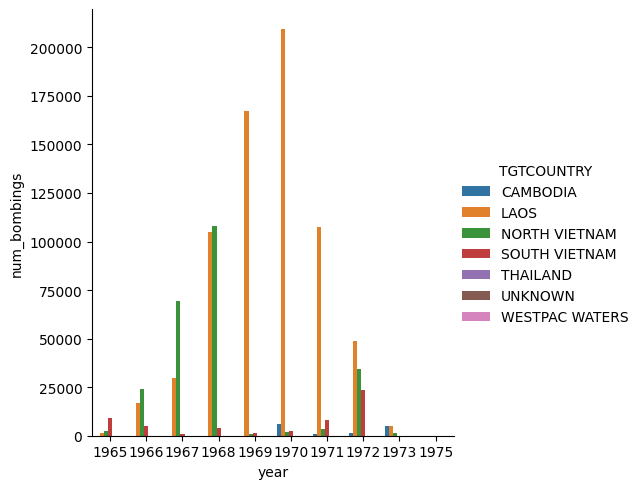

In [50]:
#| warning: false
sns.catplot(
    data = country_year_df,
    kind = "bar",
    x = 'year',
    y = 'num_bombings',
    hue = 'TGTCOUNTRY',
    orient = 'v'
)
plt.show()

We can already infer some things from this plot, but since there were so few bombings in Thailand and in the "Unknown" and "WESTPAC WATERS" categories, let's exclude these to make the plot more readable (it may be tempting to drop them, and it would typically be ok in many cases, but data-science-wise it's a bit sketchy in the sense that it would skew our results if we wanted to compute e.g. the **proportion of all bombings** in each country at some point in our analysis later on)

/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

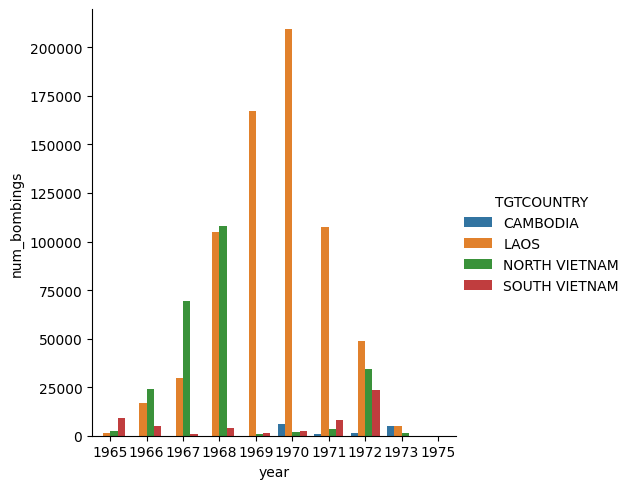

In [51]:
countries_to_keep = [
    'CAMBODIA',
    'LAOS',
    'NORTH VIETNAM',
    'SOUTH VIETNAM'
]
country_year_sub_df = country_year_df.loc[
    country_year_df['TGTCOUNTRY'].isin(countries_to_keep),
].copy()
sns.catplot(
    data = country_year_sub_df,
    kind = "bar",
    x = 'year',
    y = 'num_bombings',
    hue = 'TGTCOUNTRY',
    orient = 'v'
)
plt.show()

So for me, at least, the plot in this form really already drives home the point from the beginning of the writeup: that "The Vietnam War" really could be called "The Vietnam War Plus The Continuous Onslaught Of Modern Weaponry Rained Down Upon Laos, A Similarly Poor And Agrarian Country With A Fraction Of The Population Of Vietnam".

### (7.3) Plotting Non-Aggregated Data

Now that we've seen how to make a basic `catplot()` using aggregated data, we can move back to the **non**-aggregated (individual-bombing level) data to see how `catplot()` can **automatically** aggregate data for us, in whatever way enables it to make the plot we ask for. This is a super powerful function, in that sense, it just runs much more slowly (so I wanted to show some quick-to-generate examples first!)

Looking again at the columns in `strike_df` here, as a reminder:

In [52]:
strike_df.columns

Index(['MFUNC_DESC', 'MISSIONID', 'TGTCOUNTRY', 'THOR_DATA_VIET_ID', 'MSNDATE',
       'SOURCEID', 'NUMWEAPONSDELIVERED', 'TGTTYPE', 'TGTLATDD_DDD_WGS84',
       'TGTLONDDD_DDD_WGS84', 'year', 'num_bombings'],
      dtype='object')

We see that so far we've neglected the `NUMWEAPONSDELIVERED` variable. Let's use a **violin plot** this time to see what the data within this variable looks like:

/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

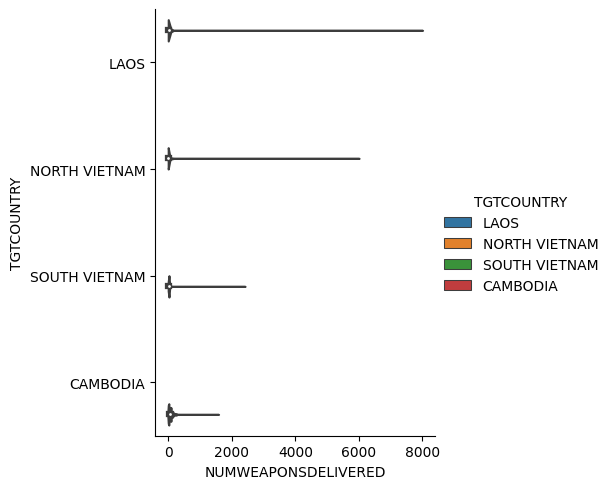

In [53]:
strike_sub_df = strike_df.loc[strike_df['TGTCOUNTRY'].isin(countries_to_keep),].copy()
sns.catplot(
    data=strike_sub_df,
    kind='violin',
    x = 'NUMWEAPONSDELIVERED',
    y='TGTCOUNTRY',
    hue='TGTCOUNTRY'
)

Although we now see that violin plots are probably **not** the best way to visualize this variable. In general violin plots are intended to plot the "curvature" of a distribution over some range of values, but in this case the distribution of our data is almost entirely concentrated at 0, with a few very extreme outlier values. We can still make some inferences, however: like how Laos was not only the **most bombed** country, but also the country which experienced the largest single bombing of the entire campaign---the extreme outlier corresponding to a bombing run where over 8000 were delivered to the target.

Finally, while we unfortunately don't have two full-on continuous numeric variables to plot in the form of (e.g.) a scatterplot, we can use the year of each mission as a type of pseudo-continous numeric variable (the full date would be even better, if we wanted to spend more time cleaning the date variable so we could visualize the day-by-day statistics), plotted against the `NUMWEAPONSDELIVERED` value for that mission (similar to the bar graph from above, but this time generated **automatically** by Seaborn from the raw, non-aggregated data):

/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


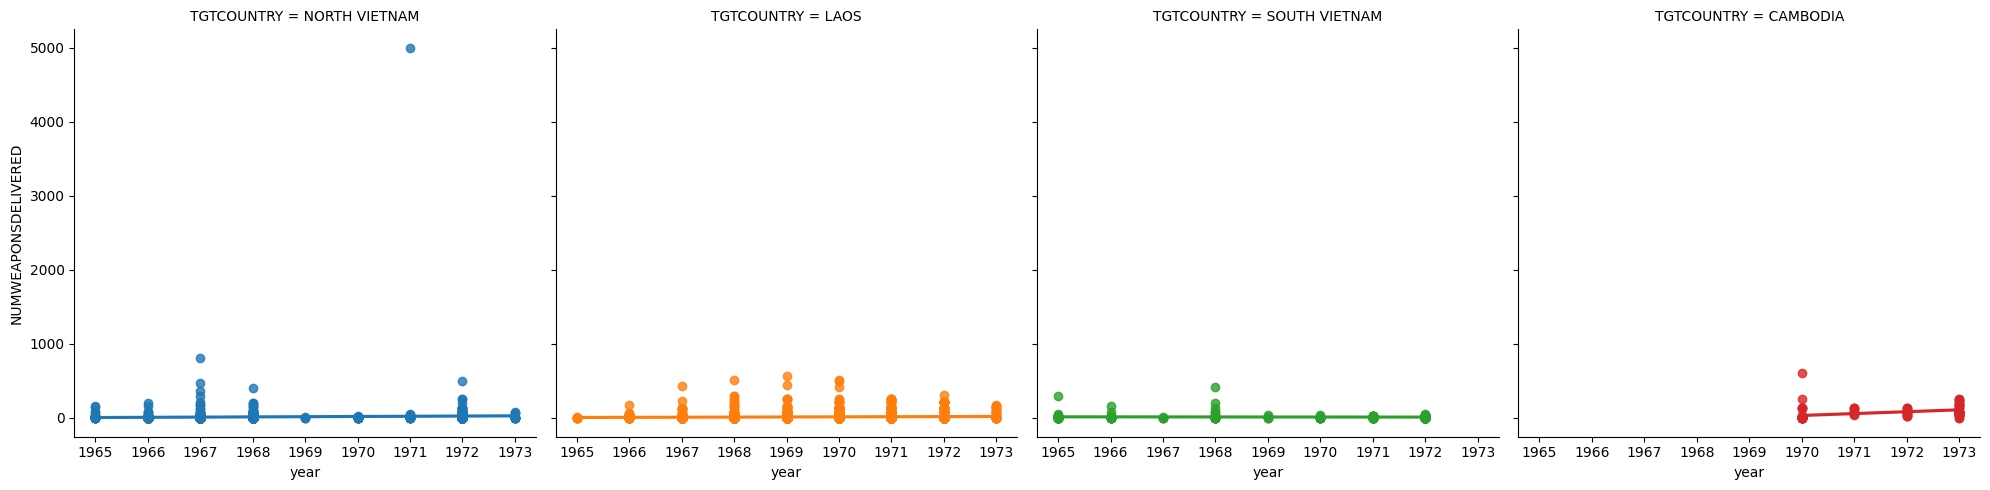

In [54]:
# Here, (1) Again we use strike_sub_df to filter out the countries outside of our 4 main countries
# and thus make the plot slightly more readable, and (2) I'm using Pandas' sample() function to
# make the number of points manageable for Seaborn to plot (since otherwise it takes over a minute,
# which is mostly spent drawing nearly 1 million points that are almost entirely down near 0)
strike_sub_sample_df = strike_sub_df.sample(10000)
sns.lmplot(
    data=strike_sub_sample_df, 
    x="year",
    y="NUMWEAPONSDELIVERED",
    col="TGTCOUNTRY",
    hue="TGTCOUNTRY")
plt.show()

And from these four plots we see what we could already probably see in the **tabulations** from earlier: that Cambodia is the only country which saw a clear year-to-year **increase** in bombings experienced, from the 1970 coup onwards. As another potential "branching path" in our EDA journey, we could feasibly dive far more deeply into this phenomenon in the Cambodia data specifically: visualizing these bombing-rate increases at a more fine-grained daily level, for example, and seeing whether/how they relate to political and military developments in Sihanouk's/China's backing of the Khmer Rouge.

And, last but certainly not least, a **correlogram** of our **aggregated** variables, generated using the same code as used in the W06 lab demo (we first display the full `country_year_sub_df`, so we can glance back and forth between the correlations encoded as colors in the correlogram and the values themselves)

In [55]:
country_year_sub_df

,TGTCOUNTRY,year,mean_weapons,num_bombings,mean_lat,mean_lon
0,CAMBODIA,1967,5.500000,18,14.664901,106.965969
1,CAMBODIA,1969,3.608696,23,14.452686,107.523425
2,CAMBODIA,1970,19.907526,6099,12.656550,106.588893
3,CAMBODIA,1971,84.664602,1130,13.221369,106.461660
4,CAMBODIA,1972,80.004827,1243,12.587244,106.407726
5,CAMBODIA,1973,106.332072,4758,11.898209,105.176818
6,LAOS,1965,10.939850,1197,17.552708,105.521857
7,LAOS,1966,11.938068,16825,16.618527,106.264797
8,LAOS,1967,12.266561,29738,16.364346,106.365654
9,LAOS,1968,9.391200,105046,17.052071,105.898343


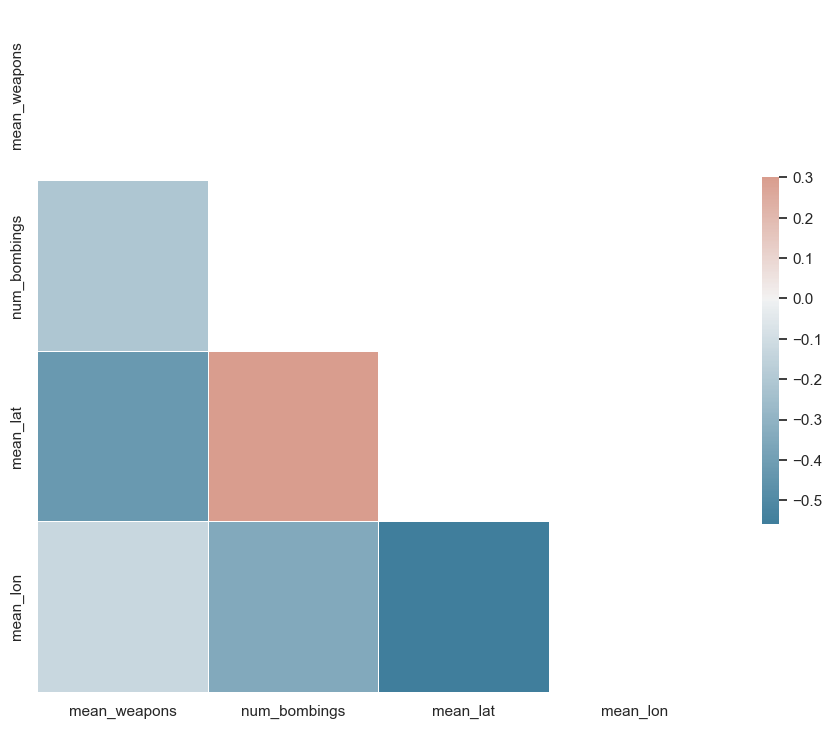

In [56]:
sns.set_theme(style="white")
corr_vars = ['mean_weapons', 'num_bombings', 'mean_lat', 'mean_lon']
corr = country_year_sub_df[corr_vars].corr()  #Compute the correlation matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(11, 9)) #initialize figure

cmap = sns.diverging_palette(230, 20, as_cmap=True) #custom diverging colormap

    # # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()